# Prosper Loan Dataset
        by Uju Chinedum

## Investigation Overview

> The aim of this presentation is to highlight key insights from the data. They include:
> - What is the relationship between `ProsperScore` and `ProsperRating`?
> - Does `ProsperScore` influence `BorrowerAPR`?


## Dataset Overview

> The dataset comprises of 113937 rows and 81 columns initially with 3 boolean columns, 61 numeric columns and 14 object columns but there are a lot of columns with too many missing values and incorrect data types. After investigatig those columns, I found that they were unique and needed but with no way to get them, I decided to drop those columns with extreme missing values (i.e >=58848 missing values) and fill the remaining. After that the new dataframe comprised of 113937 rows ands 69 columns with 3 boolean columns, 4 datetime columns, 48 numeric columns and 14 object columns. Also, I found that `ProsperRating (numeric)` and `ProsperRating (Alpha)` are the same, the only difference is how they are represented

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

sb.set_style("dark")

In [2]:
data = pd.read_csv("modified.csv")

## Distribution of Borrower APR

A histogram is used to show the distribution. It has a somewhat normal distribution with a spike in value around 0.35 - 0.37 percent.

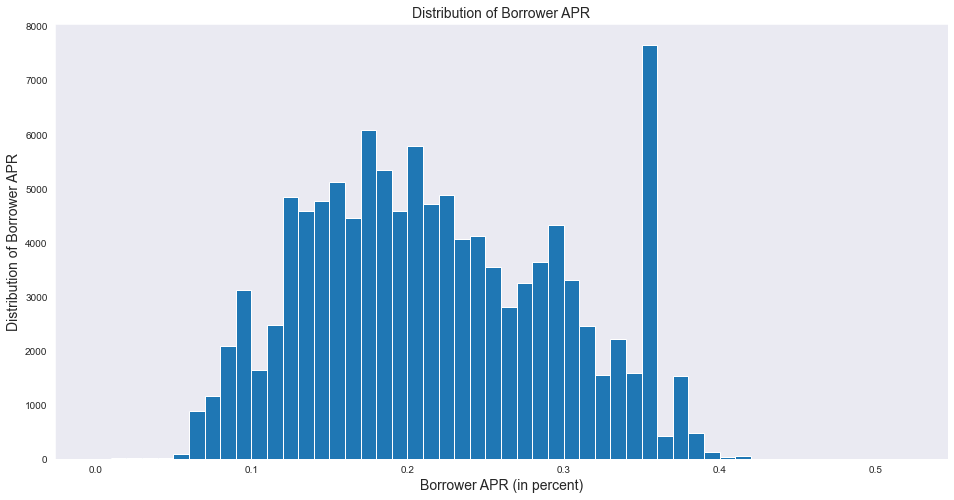

In [3]:
edges = np.arange(0, data["BorrowerAPR"].max() + 0.01, 0.01)

plt.figure(figsize = (16, 8))
plt.hist(data = data, x = "BorrowerAPR", bins = edges)

plt.title("Distribution of Borrower APR", fontsize = 14)
plt.xlabel("Borrower APR (in percent)", fontsize = 14)
plt.ylabel("Distribution of Borrower APR", fontsize = 14)

plt.show()

## Relationship Between Prosper Rating and Prosper Score

The first plot shows the distribution of the individual features in a bar chart with Prosper Score `5` and Prosper Rating `4` been the mode. The frequency of these two increased as the ratings until they got to the mode and then began to fall. The second plot shows the relationship between the two features using a clustered bar chart. Each Rating had varying levels of Score but Rating `5` had the highest Score of `4`. I also noticed that Scores `8`, `9`, `10`, `11` had no relationhip with the Ratings.
Note: The plot was limited to show a clearer view but the actual value of the highest bar is above `30000`

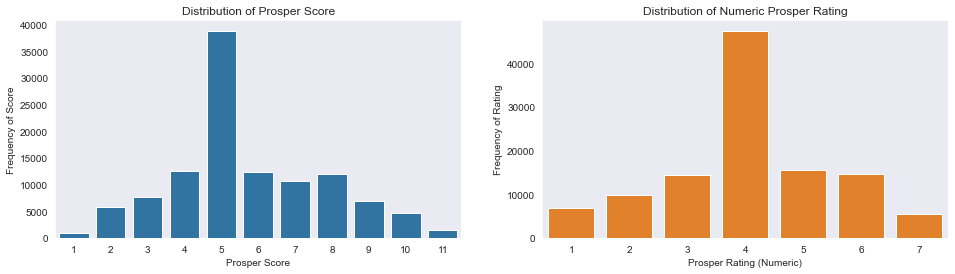

In [4]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sb.countplot(data = data, x = "ProsperScore", color = sb.color_palette()[0])

plt.title("Distribution of Prosper Score")
plt.xlabel("Prosper Score")
plt.ylabel("Frequency of Score")

plt.subplot(1, 2, 2)
sb.countplot(data = data, x = "ProsperRating (numeric)", color = sb.color_palette()[1])

plt.title("Distribution of Numeric Prosper Rating")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Frequency of Rating")

plt.show()

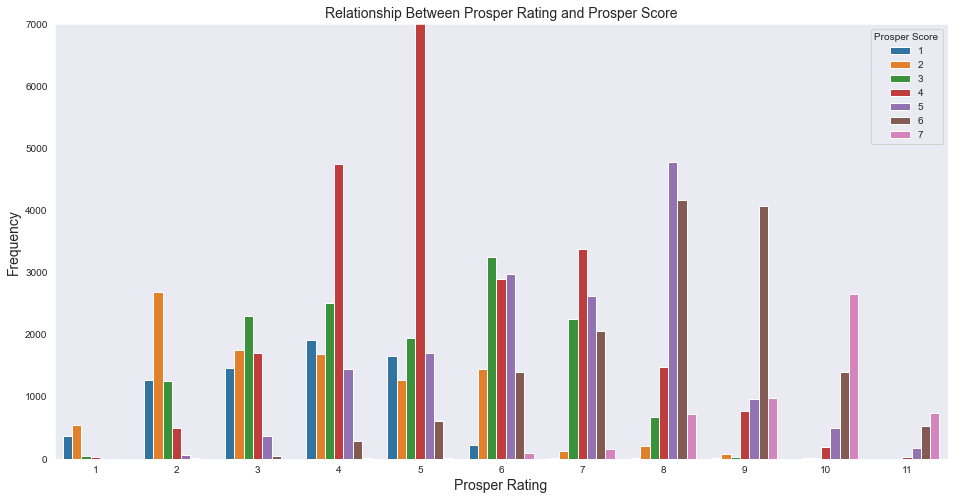

In [5]:
plt.figure(figsize = (16, 8))
sb.countplot(data = data, x = "ProsperScore", hue = "ProsperRating (numeric)")

plt.title("Relationship Between Prosper Rating and Prosper Score", fontsize = 14)
plt.xlabel("Prosper Rating", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.ylim(0, 7000)

plt.legend(title = "Prosper Score", loc = "upper right")

plt.show()

## Relationship Between Prosper Score and Borrower APR

A box plot is used to depict the relationship between the Prosper Score and the Borrower APR. It shows that Prosper Score 5 had a wider range of Borrower APR. Prosper Score 4 had the highest Borrower APR. The max Borrower APR tended to decrease as Prosper Score increased.

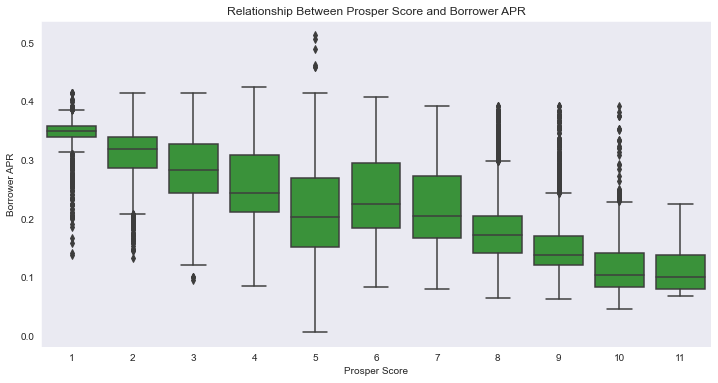

In [6]:
plt.figure(figsize = (12, 6))

plt.title("Relationship Between Prosper Score and Borrower APR")
sb.boxplot(data = data, x = "ProsperScore", y = "BorrowerAPR", color = sb.color_palette()[2])

plt.xlabel("Prosper Score")
plt.ylabel("Borrower APR")

plt.show()

## Relationship Between Prosper Rating, Prosper Score and Employment Status

Two seperate clustered bar charts were used to show this relationship. It shows that for every Rating and Score, Employed people made up most of the consideration. Not available and Part-time made up the least except in the Rating 4 and Score 5 where Full-time makes the highest consideration and Not available also made a considerable portion compared to others.

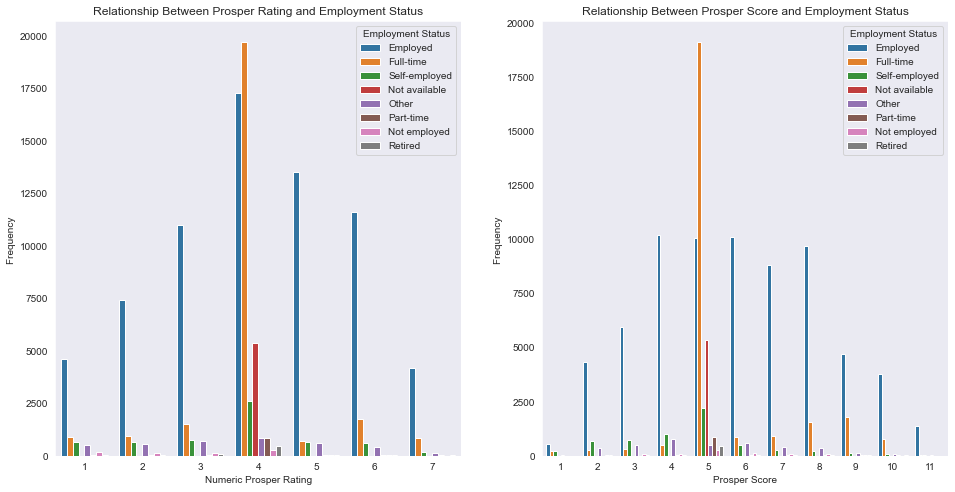

In [7]:
arr = data["EmploymentStatus"].value_counts().index

plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
sb.countplot(data = data, x = "ProsperRating (numeric)", hue = "EmploymentStatus", hue_order = arr)

plt.title("Relationship Between Prosper Rating and Employment Status")
plt.xlabel("Numeric Prosper Rating")
plt.ylabel("Frequency ")

plt.legend(title = "Employment Status")

plt.subplot(1, 2, 2)
sb.countplot(data = data, x = "ProsperScore", hue = "EmploymentStatus", hue_order = arr)

plt.title("Relationship Between Prosper Score and Employment Status")
plt.xlabel("Prosper Score")
plt.ylabel("Frequency ")

plt.legend(title = "Employment Status", loc = "upper right")

plt.show()

In [ ]:
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt